In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Dipolar(x, y, mx, my, i, j):
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dij = np.sqrt(dx**2 + dy**2)
    dx /= dij
    dy /= dij
    A1 = mx[i]*mx[j] + my[i]*my[j]
    A2 = 3*(mx[i]*dx + my[i]*dy)*(mx[j]*dx + my[j]*dy)
    return 0.5*(A1 - A2)/dij**3

# Modelo

(-0.5, 1.5)

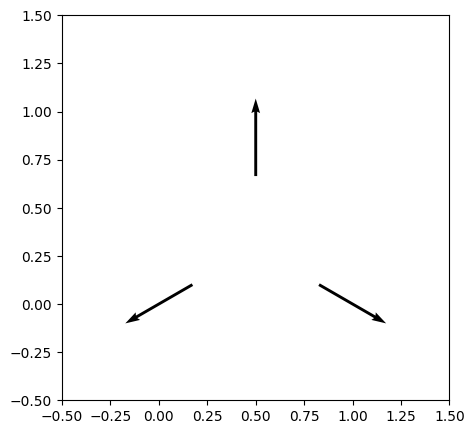

In [3]:
x0 = [0, 0.5, 1.0]
y0 = [0, np.sin(np.deg2rad(60)), 0]

mx0 = [-np.cos(np.deg2rad(30)), np.cos(np.deg2rad(90)), -np.cos(np.deg2rad(150))]
my0 = [-np.sin(np.deg2rad(30)), np.sin(np.deg2rad(90)), -np.sin(np.deg2rad(150))]

plt.figure(figsize=(5,5))

plt.quiver(x0, y0, mx0, my0, pivot='middle', scale=5)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)


In [4]:
x = []
y = []
mx = []
my = []

for j in range(5):
    for i in range(5):
        for k in range(3):
            x.append(x0[k] + 2*i + (j)%2)
            y.append(y0[k] + 2*np.sin(np.deg2rad(60))*(j))
            mx.append(mx0[k])
            my.append(my0[k])
            
C = np.arctan2(my, mx)

(-0.5, 10.5, -0.3897114317029974, 8.183940065762945)

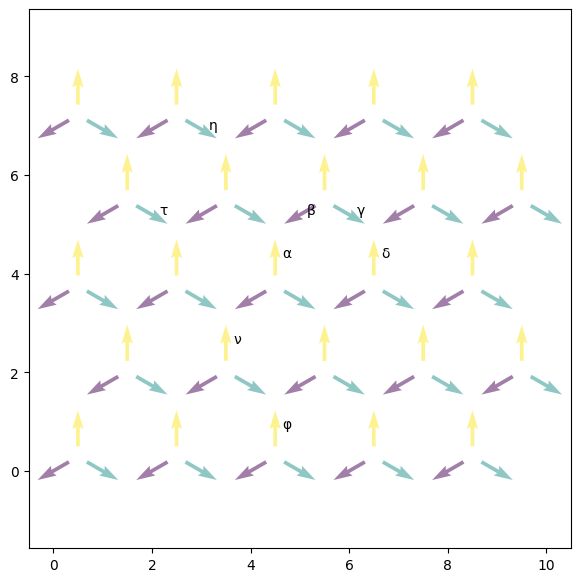

In [5]:
plt.figure(figsize=(7,7))
plt.quiver(x, y, mx, my, C, pivot='middle', scale=15, alpha=0.5)

j = [37, 51, 53, 19, 40, 47, 65, 7]
a = ['alpha', 'beta', 'gamma', 'nu', 'delta', 'tau', 'eta', 'phi']
b = ['\u03B1', '\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']


for i, nome in zip(j, b):
    plt.text(x[i]+0.15, y[i], s=nome)

plt.axis('equal')

In [6]:
i = 37
j = [51, 53, 19, 40, 47, 65, 7]
a = ['beta', 'gamma', 'nu', 'delta', 'tau', 'eta', 'phi']
b = ['\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']

for k, nome in zip(j, b):
    dipolar = Dipolar(x, y, mx, my, 1, i, k)
    print(f"Dipolar \u03B1{nome} = {dipolar:.5f}")

TypeError: Dipolar() takes 6 positional arguments but 7 were given

In [7]:
Dnn = Dipolar(x, y, mx, my, 37, 51)
Dnn

0.8749999999999993

# $J_{nn}$ = $5D$

In [8]:
Jnn = 5/Dnn
Jnn

5.714285714285719

In [9]:
Dnn2 = Jnn*Dipolar(x, y, mx, my, 37, 51)
Dnn2

5.0

(-0.5, 10.5, -0.3897114317029974, 8.183940065762945)

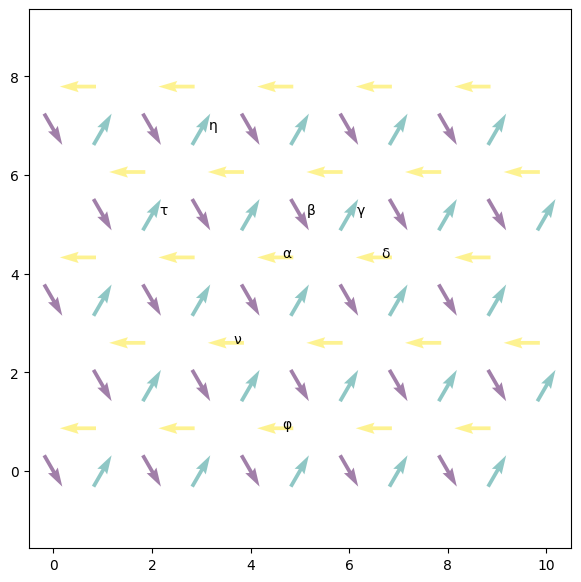

In [41]:
plt.figure(figsize=(7,7))

x, y, mx, my = gerar_rede(90)

plt.quiver(x, y, mx, my, C, pivot='middle', scale=15, alpha=0.5)

j = [37, 51, 53, 19, 40, 47, 65, 7]
a = ['alpha', 'beta', 'gamma', 'nu', 'delta', 'tau', 'eta', 'phi']
b = ['\u03B1', '\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']


for i, nome in zip(j, b):
    plt.text(x[i]+0.15, y[i], s=nome)

plt.axis('equal')

In [56]:
i = 37
j = [51, 53, 19, 40, 47, 65, 7]
a = ['beta', 'gamma', 'nu', 'delta', 'tau', 'eta', 'phi']
b = ['\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']

In [57]:
def gerar_rede(dtheta = 0):
    x0 = [0, 0.5, 1.0]
    y0 = [0, np.sin(np.deg2rad(60)), 0]
    
    mx0 = [-np.cos(np.deg2rad(30 + dtheta)), np.cos(np.deg2rad(90+ dtheta)), -np.cos(np.deg2rad(150+ dtheta))]
    my0 = [-np.sin(np.deg2rad(30+ dtheta)), np.sin(np.deg2rad(90+ dtheta)), -np.sin(np.deg2rad(150+ dtheta))]
    
    x = []
    y = []
    mx = []
    my = []

    for j in range(5):
        for i in range(5):
            for k in range(3):
                x.append(x0[k] + 2*i + (j)%2)
                y.append(y0[k] + 2*np.sin(np.deg2rad(60))*(j))
                mx.append(mx0[k])
                my.append(my0[k])
                
    return x, y, mx, my

In [58]:
def Dipolar(x, y, mx, my, i, j):
    dx = x[i] - x[j]
    dy = y[i] - y[j]
    dij = np.sqrt(dx**2 + dy**2)
    dx /= dij
    dy /= dij
    A1 = mx[i]*mx[j] + my[i]*my[j]
    A2 = 3*(mx[i]*dx + my[i]*dy)*(mx[j]*dx + my[j]*dy)
    return 0.5*(A1 - A2)/dij**3

In [59]:
def gera_dataframe():
    aa = []
    for k, nome in zip(j, b):
        aa.append(np.abs(Jnn*Dipolar(x, y, mx, my, i, k)))
    return aa

In [60]:
df = pd.DataFrame()

angles = np.linspace(0, 90, 10)
for ang in angles:
    x, y, mx, my = gerar_rede(ang)
    col = gera_dataframe()
    df[str(ang)] = col

In [61]:
df

,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
0,5.000000,4.741540,3.997333,2.857143,1.458492,0.029921,1.428571,2.568762,3.312968,3.571429
1,0.687322,0.637581,0.494358,0.274929,0.005758,0.280687,0.549857,0.769287,0.912510,0.962250
2,0.446429,0.271597,0.085546,0.089286,0.231810,0.324835,0.357143,0.324835,0.231810,0.089286
3,0.357143,0.324835,0.231810,0.089286,0.085546,0.271597,0.446429,0.588952,0.681978,0.714286
4,0.071626,0.147966,0.211112,0.253446,0.269862,0.258381,0.220387,0.160464,0.085837,0.005510
5,0.185185,0.175613,0.148049,0.105820,0.054018,0.001108,0.052910,0.095139,0.122703,0.132275
6,0.137464,0.131247,0.113344,0.085915,0.052269,0.016463,0.017183,0.044612,0.062515,0.068732


In [62]:
alpha = '\u03B1'
b = ['\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']

map = {
    0: '\u03B1\u03B2',
    1: '\u03B1\u03B3',
    2: '\u03B1\u03BD',
    3: '\u03B1\u03B4',
    4: '\u03B1\u03C4',
    5: '\u03B1\u03B7',
    6: '\u03B1\u03C6',
}
df_new = df.rename(index=map)
df_new

,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
αβ,5.000000,4.741540,3.997333,2.857143,1.458492,0.029921,1.428571,2.568762,3.312968,3.571429
αγ,0.687322,0.637581,0.494358,0.274929,0.005758,0.280687,0.549857,0.769287,0.912510,0.962250
αν,0.446429,0.271597,0.085546,0.089286,0.231810,0.324835,0.357143,0.324835,0.231810,0.089286
αδ,0.357143,0.324835,0.231810,0.089286,0.085546,0.271597,0.446429,0.588952,0.681978,0.714286
ατ,0.071626,0.147966,0.211112,0.253446,0.269862,0.258381,0.220387,0.160464,0.085837,0.005510
αη,0.185185,0.175613,0.148049,0.105820,0.054018,0.001108,0.052910,0.095139,0.122703,0.132275
αφ,0.137464,0.131247,0.113344,0.085915,0.052269,0.016463,0.017183,0.044612,0.062515,0.068732


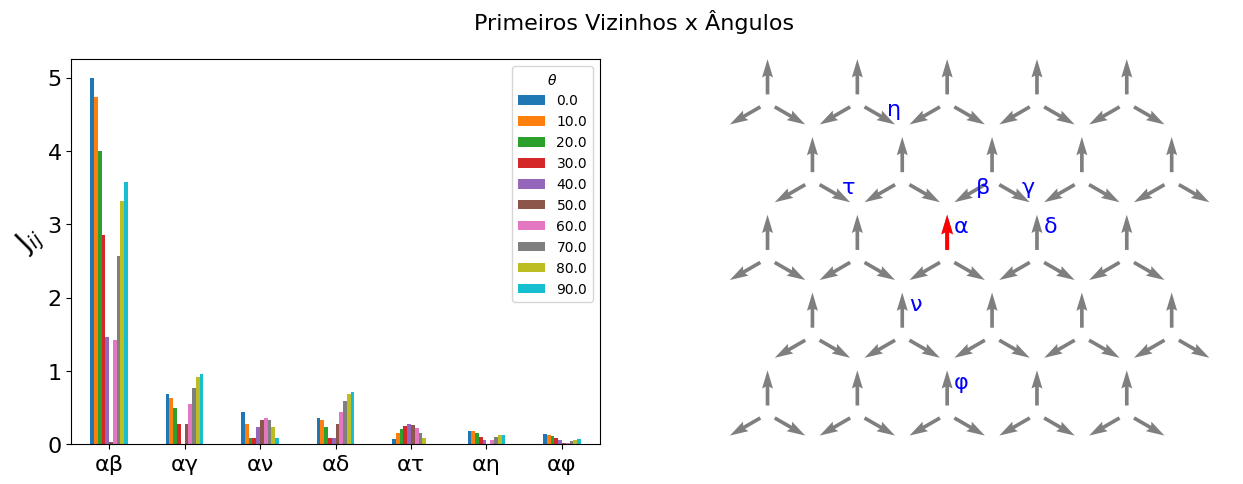

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_new.plot(ax=ax[0], kind='bar', rot=0, legend=True, fontsize=16)

ax[0].legend(loc='upper right', title="$\\theta$")
ax[0].set_ylabel("J$_{ij}$", fontsize=20, rotation=45)

x, y, mx, my = gerar_rede(0)
ax[1].quiver(x, y, mx, my, pivot='middle', scale=15, alpha=0.5)
ax[1].quiver(x[37], y[37], mx[37], my[37], pivot='middle', scale=15, color='r')

j = [37, 51, 53, 19, 40, 47, 65, 7]
aaa = ['alpha', 'beta', 'gamma', 'nu', 'delta', 'tau', 'eta', 'phi']
bbb = ['\u03B1', '\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']

for i, nome in zip(j, bbb):
    ax[1].text(x[i]+0.15, y[i], s=nome, fontsize=16, c='b')

ax[1].axis('off')
# ax[0].axis('equal')
ax[1].axis('equal')

fig.suptitle('Primeiros Vizinhos x Ângulos', fontsize=16)

plt.savefig('primeirosvizinhos.png', bbox_inches='tight')

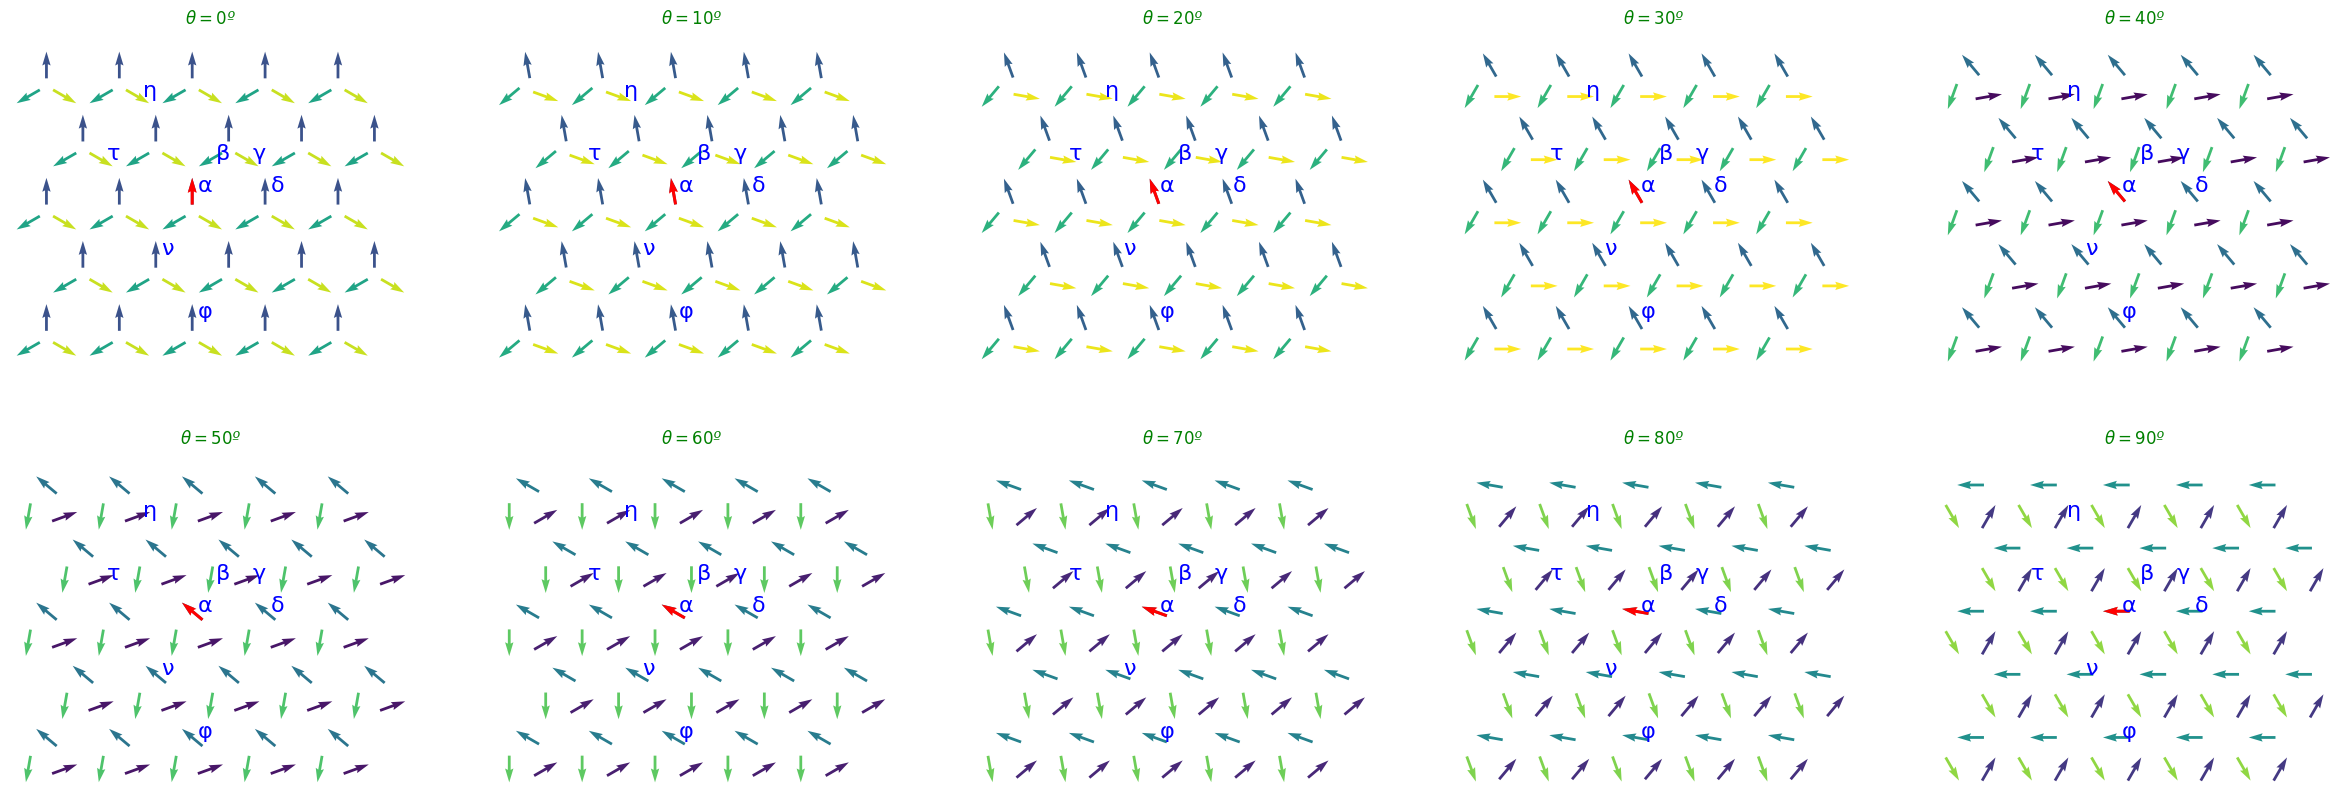

In [109]:
from matplotlib.colors import Normalize
normalize_rad = Normalize(vmin=0, vmax=2 * np.pi)

jj = [37, 51, 53, 19, 40, 47, 65, 7]
aaa = ['alpha', 'beta', 'gamma', 'nu', 'delta', 'tau', 'eta', 'phi']
bbb = ['\u03B1', '\u03B2', '\u03B3', '\u03BD', '\u03B4', '\u03C4', '\u03B7', '\u03C6']

fig, ax = plt.subplots(2, 5, figsize=(30, 10))

angles = [0, 10, 20, 30, 40, 50, 60 ,70, 80, 90]
kk = 0
for i in range(2):
    for j in range(5):
        
        x, y, mx, my = gerar_rede(angles[kk])
        C = np.arctan2(my,mx)
        C[C < 0] = 2 * np.pi + C[C < 0]
        
        ax[i,j].quiver(x, y, mx, my, C, pivot='middle', scale=15, alpha=1, cmap='viridis', norm=normalize_rad, angles='xy')
        ax[i,j].quiver(x[37], y[37], mx[37], my[37], pivot='middle', scale=15, color='r')

        for k, nome in zip(jj, bbb):
            ax[i,j].text(x[k]+0.15, y[k], s=nome, fontsize=16, c='b')
        
        ax[i,j].axis('equal')
        ax[i,j].axis('off')
        ax[i,j].set_title(f'$\\theta = {angles[kk]} º$', color='g')
        kk += 1
        
plt.savefig('angulos.png', bbox_inches='tight')